# Import Libraries

In [1]:
import pandas as pd #library to load the datasets
import numpy as np #library for numerical operations

# Read the Datasets
Dataset link: https://www.kaggle.com/c/digit-recognizer/data

In [22]:
#load the training dataset
mnist = pd.read_csv("C:\\Users\\ss3727s\\OneDrive - Missouri State University\\635 Data Mining\\Assignment 3\\MNIST_train.csv")

In [23]:
#Check out the size of the training dataset
mnist.shape

(949, 785)

In [24]:
#In the training dataset first column is Class_Label so extraxted the first column as a dependent feature 
#and store the remaining columns as independent features.
X = mnist.iloc[:, 1:].values #independent features of training dataset
y = mnist['label'].values #dependent feature of training dataset

# load the test dataset
In the test dataset first column is Class_Label so extraxted the first column as a dependent feature and store the remaining columns as independent features.

In [26]:
mnist_test = pd.read_csv('C:\\Users\\ss3727s\\OneDrive - Missouri State University\\635 Data Mining\\Assignment 3\\MNIST_test.csv')
X_test = mnist_test.iloc[:, 1:].values
y_test = mnist_test['label'].values

In [27]:
#Check out the size of the test dataset
mnist_test.shape

(50, 785)

# Euclidean Distance

Formula to calculate Euclidean Distance of two point p and q. 
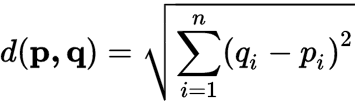 
Ref: https://www.cuemath.com/euclidean-distance-formula/

In [42]:
def Eudistance(pA, pB):
    return (np.sum((pA - pB)**2)**0.5)

# K-Nearest Neighbor

In [43]:
def kNN(X, y, x_query, k):    
    m = X.shape[0] #initialize m with the number of values first tuple holds
    distances = [] #initialize an empty array named distances
    
    for i in range(m):
        dis = Eudistance(x_query, X[i]) #for every points in the X_query which is basically X_test, calcultates the euclidean distance
        distances.append((dis, y[i])) #after calculation append the result in y
    
    distances = sorted(distances) #Sort the distance in ascendant manner
    
    distances = distances #sorted distances are stored
    distances = distances[:k] #among the sorted distances, select k distances
    
    distances = np.array(distances) #store k distances in an array format
    labels = distances[:,1]
    
    uniq_label, counts = np.unique(labels, return_counts=True)    
    pred = uniq_label[counts.argmax()] #return the majory classes
    
    return int(pred)

# Input number of neighbors i.e. the value of K and make predictions for all the samples in X_test

In [45]:
k = int(input("K = ")) 
predictions = []
for i in range(50):
    temp = kNN(X, y, X_test[i], k)
    predictions.append(temp)
print ('................................................')    
predictions = np.array(predictions)
for pred in range (len(predictions)):
    print('Desired class: %d computed class: %d' % (y_test[pred], predictions[pred]))

K = 4
................................................
Desired class: 0 computed class: 0
Desired class: 0 computed class: 0
Desired class: 0 computed class: 0
Desired class: 0 computed class: 0
Desired class: 0 computed class: 0
Desired class: 1 computed class: 1
Desired class: 1 computed class: 1
Desired class: 1 computed class: 1
Desired class: 1 computed class: 1
Desired class: 1 computed class: 1
Desired class: 2 computed class: 8
Desired class: 2 computed class: 2
Desired class: 2 computed class: 2
Desired class: 2 computed class: 6
Desired class: 2 computed class: 2
Desired class: 3 computed class: 3
Desired class: 3 computed class: 3
Desired class: 3 computed class: 3
Desired class: 3 computed class: 3
Desired class: 3 computed class: 3
Desired class: 4 computed class: 2
Desired class: 4 computed class: 4
Desired class: 4 computed class: 4
Desired class: 4 computed class: 4
Desired class: 4 computed class: 9
Desired class: 5 computed class: 5
Desired class: 5 computed class: 6


# Calculate Accuracy, Number of Missclassified Samples and Total test Samples

In [46]:
#compare the predicted value with the desired value and if yes, add them all and divide them with the total length
accuracy = (y_test[:50] == predictions).sum()/len(predictions) 
print("Accuracy Rate:", accuracy*100,'%')

# Number of Missclassified Sample
print("Number of misclassified test samples:",int (len(y_test)-(accuracy*len(y_test))))


# Total number of test sample
print("Total number of test samples:",len(X_test))

Accuracy Rate: 86.0 %
Number of misclassified test samples: 7
Total number of test samples: 50
